# Sales Analysis

In [2]:
# Import libraries
import numpy as np
import pandas as pd
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# See all the files in the directory
files = [file for file in os.listdir('./Sales_Data')]


for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
# Load all of the files into a single pandas dataframe
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# Save as a csv
all_months_data.to_csv("all_data.csv", index=False)

## Question 1: What was the best month for sales? How much was earned that month?

In [6]:
# Load in the data
all_data = pd.read_csv("all_data.csv")

# See first five rows
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
# How many rows and columns in the dataset?
all_data.shape

(186850, 6)

In [8]:
# Drop rows with missing values in all the columns
all_data = all_data.dropna(how='all')

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
# Remove strings from Quantity Ordered Column
clean_df = all_data[all_data['Quantity Ordered']!='Quantity Ordered']

In [10]:
# Convert Order Date column to datetime datatype
clean_df['Order Date'] = pd.to_datetime(clean_df['Order Date'], errors='coerce')

In [11]:
# Convert Quantity Ordered and Price Each column to numeric datatypes
clean_df['Quantity Ordered'] = pd.to_numeric(clean_df['Quantity Ordered'])
clean_df['Price Each'] = pd.to_numeric(clean_df['Price Each'])

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [12]:
# Create a new column for the month the order took place
clean_df['Month'] = clean_df['Order Date'].dt.month

clean_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [13]:
# Create a new column for the total sales (in $)
clean_df['Total Sales'] = clean_df['Quantity Ordered'] * clean_df['Price Each']

clean_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
# Calculate total dollar sales by month
monthly_sales = clean_df.groupby('Month')['Total Sales'].sum().reset_index()

# Sort months by highest number of sales to lowest number of sales
monthly_sales.sort_values(by='Total Sales', ascending=False).set_index('Month')

,Total Sales
Month,
12,"4,613,443.34"
10,"3,736,726.88"
4,"3,390,670.24"
11,"3,199,603.20"
5,"3,152,606.75"
3,"2,807,100.38"
7,"2,647,775.76"
6,"2,577,802.26"
8,"2,244,467.88"


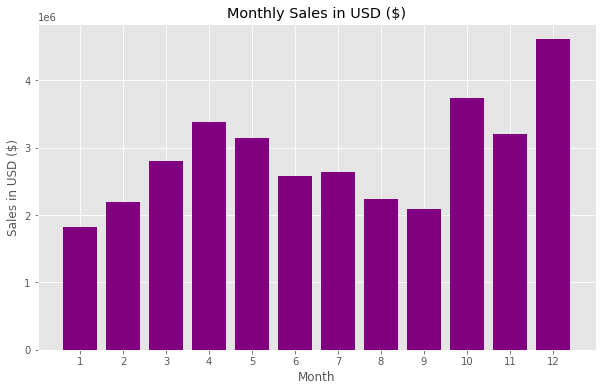

In [15]:
# Plot Total Sales by Month
plt.figure(figsize=(10,6))
plt.bar(monthly_sales['Month'], monthly_sales['Total Sales'], color='purple')
plt.xticks(monthly_sales['Month'])
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales in USD ($)');

### The best month for sales was December. $4,613,443 was earned that month.

## 2. What time of day should we display advertisements to maximize the likelihood of a customer buying a product?

In [368]:
# Create an hour column
clean_df['Hour'] = clean_df['Order Date'].dt.hour

clean_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [369]:
# Calculate total sales by Hour
Hourly_Sales = clean_df.groupby('Hour').sum()['Total Sales'].reset_index().set_index('Hour')

Hourly_Sales.sort_values('Total Sales', ascending=False)

,Total Sales
Hour,
19,"2,412,938.54"
12,"2,316,821.34"
11,"2,300,610.24"
20,"2,281,716.24"
18,"2,219,348.30"
13,"2,155,389.80"
17,"2,129,361.61"
14,"2,083,672.73"
21,"2,042,000.86"


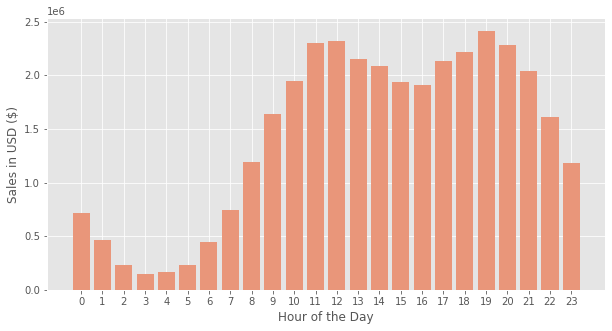

In [371]:
plt.figure(figsize=(10,5))
plt.bar(Hourly_Sales.index, Hourly_Sales['Total Sales'], color='darksalmon')
plt.xticks(Hourly_Sales.index.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Sales in USD ($)');

### The best time to display an advertisement is between 7 pm and 8 pm followed by 12 pm to 1 pm.



## 3. Which city had the highest number of sales?

In [372]:
# Create a City column
clean_df['City'] = clean_df['Purchase Address'].apply(lambda x: x.split(',')[1])

# Create a State column
clean_df['State'] = clean_df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

clean_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Hour,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles,CA


In [376]:
# Create a new column combining City + State, because there could be two cities with the same name located in different states.
clean_df['Location'] = clean_df['City'] + ', ' + clean_df['State']

list(clean_df['Location'].unique())

[' Dallas, TX',
 ' Boston, MA',
 ' Los Angeles, CA',
 ' San Francisco, CA',
 ' Seattle, WA',
 ' Atlanta, GA',
 ' New York City, NY',
 ' Portland, OR',
 ' Austin, TX',
 ' Portland, ME']

In [381]:
clean_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Hour,City,State,Location
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles,CA,"Los Angeles, CA"


In [428]:
sales_by_city = clean_df.groupby('Location').sum()['Total Sales'].reset_index()

sales_by_city

,Location,Total Sales
0,"Atlanta, GA","2,795,498.58"
1,"Austin, TX","1,819,581.75"
2,"Boston, MA","3,661,642.01"
3,"Dallas, TX","2,767,975.40"
4,"Los Angeles, CA","5,452,570.80"
5,"New York City, NY","4,664,317.43"
6,"Portland, ME","449,758.27"
7,"Portland, OR","1,870,732.34"
8,"San Francisco, CA","8,262,203.91"
9,"Seattle, WA","2,747,755.48"


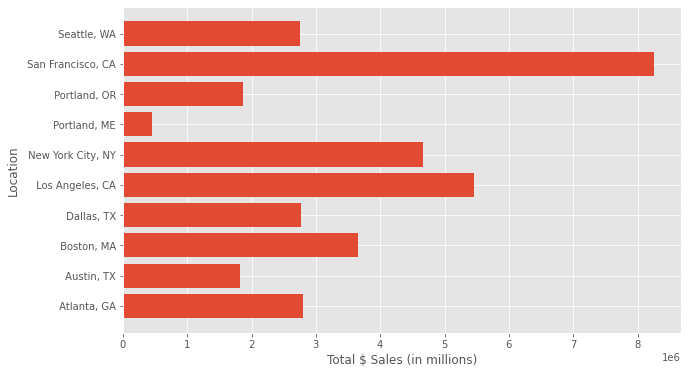

In [435]:
sales_by_city = clean_df.groupby('Location').sum()['Total Sales'].reset_index()


# Plot total sales by city
plt.figure(figsize=(10,6))
plt.barh(sales_by_city['Location'], sales_by_city['Total Sales'])
plt.xlabel('Total $ Sales (in millions)')
plt.ylabel('Location');

### The city with the highest number of sales is San Francisco, CA with over $8.26 million dollars in total sales.

In [411]:
# Further analysis of total sales each month for the different locations in the dataset
monthly_sales_by_location = pd.DataFrame(clean_df.groupby(['Location', 'Month']).sum()['Total Sales'])

monthly_sales_by_location

Total Sales
Location           Month             
 Atlanta, GA       1       149,159.54
                   2       176,470.30
                   3       231,905.38
                   4       284,448.91
                   5       238,853.99
                   6       219,816.47
                   7       211,766.47
                   8       169,267.66
                   9       171,278.89
                   10      306,293.01
                   11      275,338.70
                   12      360,899.26
 Austin, TX        1        88,087.06
                   2       108,787.40
                   3       154,549.27
                   4       172,683.59
                   5       160,635.22
                   6       144,057.29
                   7       150,324.93
                   8       125,713.61
                   9       106,483.70
                   10      203,196.12
                   11      171,286.47
                   12      233,777.09
 Boston, MA        1       201,088.49
                   2       214,808.36
                   3       301,023.81
                   4       353,807.11
                   5       328,803.65
                   6       254,747.89
                   7       291,497.14
                   8       239,275.26
                   9       248,408.73
                   10      367,036.39
                   11      351,546.02
                   12      509,599.16
 Dallas, TX        1       143,462.51
                   2       186,667.99
                   3       222,376.68
                   4       251,360.48
                   5       268,456.49
                   6       186,885.75
                   7       212,325.17
                   8       179,763.46
                   9       164,212.86
                   10      323,135.60
                   11      248,609.56
                   12      380,718.85
 Los Angeles, CA   1       288,601.90
                   2       342,061.66
                   3       429,929.37
                   4       550,264.02
                   5       499,689.21
                   6       451,531.93
                   7       394,334.64
                   8       345,893.50
                   9       354,075.69
                   10      612,453.25
                   11      499,690.79
                   12      684,044.84
 New York City, NY 1       260,591.29
                   2       305,372.26
                   3       367,262.20
                   4       449,447.75
                   5       436,126.40
                   6       324,148.58
                   7       355,716.10
                   8       303,183.46
                   9       300,563.83
                   10      486,954.41
                   11      428,180.32
                   12      646,770.83
 Portland, ME      1        22,708.80
                   2        29,845.49
                   3        30,516.29
                   4        42,536.49
                   5        57,978.76
                   6        30,025.33
                   7        32,421.14
                   8        35,996.60
                   9        28,759.56
                   10       52,322.52
                   11       34,681.22
                   12       51,966.07
 Portland, OR      1        92,276.76
                   2       119,606.37
                   3       156,691.72
                   4       197,441.63
                   5       173,729.25
                   6       139,562.02
                   7       143,994.49
                   8       116,881.14
                   9       103,811.88
                   10      201,778.34
                   11      173,210.70
                   12      251,748.04
 San Francisco, CA 1       435,588.33
                   2       547,072.34
                   3       693,726.96
                   4       812,426.19
                   5       776,679.49
                   6       613,173.48
                   7       642,881.76
                   8       538,778.1

## 4. What products are most often sold together?

In [455]:
clean_df.shape

(185950, 12)

In [457]:
new_df = clean_df[clean_df['Order ID'].duplicated(keep=False)]

new_df.shape

(14649, 12)

In [ ]:
# Create a new column which groups the products bought under a single order together
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

In [461]:
grouped_df = new_df[['Order ID', 'Grouped']].drop_duplicates()

grouped_df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [466]:
from itertools import combinations
from collections import Counter

count = Counter()

# Get the products that are most often sold together.
for row in df2['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### The top 3 products that are most often sold together are:
- the iPhone and Lightning Charging Cable with 1005
- the Google Phone and USB-C Charging Cable with 987
- the iPhone and Wired Headphone with 447


## 5. What product sold the most? Why do you think it sold the most?

In [474]:
clean_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Hour,City,State,Location
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas,TX,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston,MA,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles,CA,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles,CA,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles,CA,"Los Angeles, CA"


In [522]:
quantity_ordered = pd.DataFrame(clean_df.groupby('Product').sum()['Quantity Ordered'])

quantity_ordered.head()

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635


Text(0.5, 0, 'Quantity Sold')

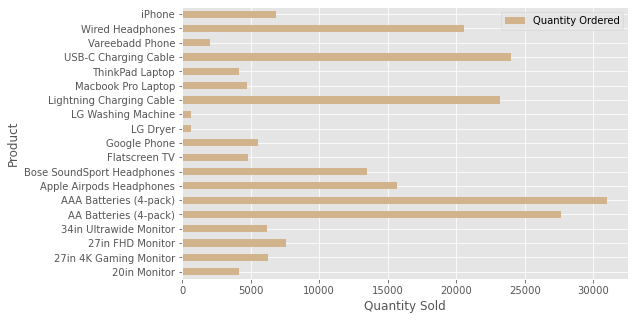

In [515]:
quantity_ordered.plot(kind='barh', color='tan', figsize=(8,5))
plt.xlabel('Quantity Sold')

### AAA Batteries sold the most with over 30,000 units sold.

In [545]:
prices = pd.DataFrame(clean_df.groupby('Product').mean()['Price Each'])

prices.sort_values(by='Price Each')

,Price Each
Product,
AAA Batteries (4-pack),2.99
AA Batteries (4-pack),3.84
USB-C Charging Cable,11.95
Wired Headphones,11.99
Lightning Charging Cable,14.95
Bose SoundSport Headphones,99.99
20in Monitor,109.99
27in FHD Monitor,149.99
Apple Airpods Headphones,150.00


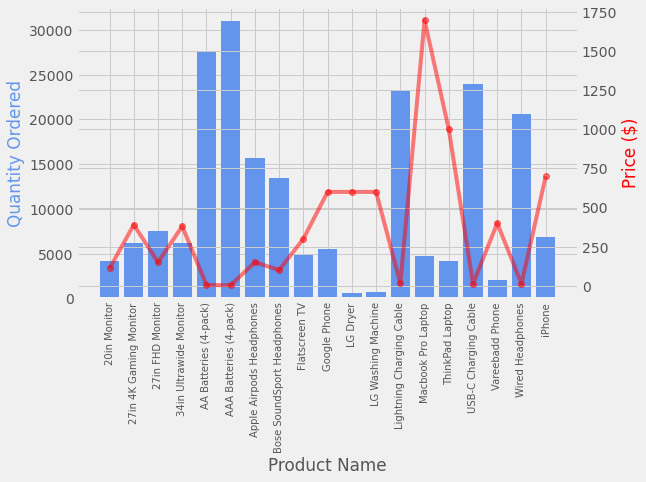

In [555]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(8,5))

ax2 = ax1.twinx()
ax1.bar(quantity_ordered.index, quantity_ordered['Quantity Ordered'], color='cornflowerblue')
ax2.plot(prices['Price Each'], color='r', marker='o', alpha=0.5)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='cornflowerblue')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(quantity_ordered.index, rotation='vertical', size=10)

plt.show()

### AAA batteries seemed to have sold the most because they are the least expensive item that this company sells at $2.99 each.